# Linear Regression Case Study
In this notebook, we'll build a linear regression model to predict **Sales** using an appropriate predictor variable.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings(action='ignore')

### Reading and understanding the data

In [3]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


predictor variables = ['TV', 'Radio', 'Newspaper']

target variable = ['Sales']

### Visualising the data

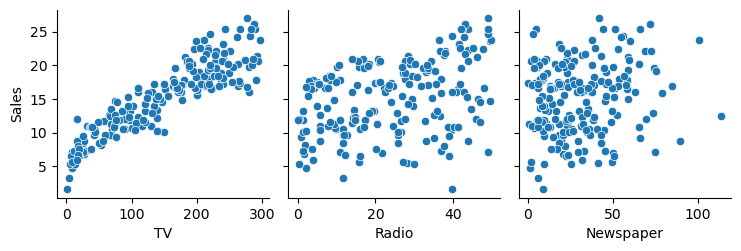

In [7]:
sns.pairplot(data = data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'])
plt.show()

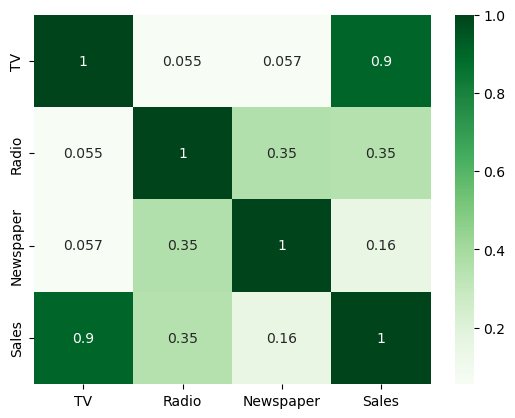

In [8]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.show()

### Performing simple linear regression using 'statsmodel' library

We will take TV as our predector variable.

y = c + m1 * X

#### Steps for model building
- Create X and y
- Create train and test set (70-30, or 80-20) ratio
- Train the model on training set
- Evaluate the model on training set (Residual Analysis)
- Evaluate the model on test set

#### 1. create X and y

In [9]:
X = data['TV']
y = data['Sales']

#### 2. create train and test set by (70:30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

# since we are using statsmodel for the regression analysis and stats model ignores the intercept in regression line, 
# so our equation will be y = m1 * X. To avoid this we must modify our train dataset(X_train) by adding a constant column
# with value = 1. So equation will be y = m1 * X1 + m2 * X2, here X2 is all 1 then equation is y = m1 * X + m2, which is same
# as regression line equation

X_train_sm = sm.add_constant(X_train)

#### 3. train the model on training set

In [11]:
ols = sm.OLS(y_train, X_train_sm) # Ordinary Least Squares
model = ols.fit()

In [12]:
model.params

const    6.948683
TV       0.054546
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.52e-52
Time:                        09:30:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regression line is Sales = 6.949 + 0.055 * TV**

Lets analyse the **summary statistics**

- **F-statistic**

You were introduced to a new term named F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient 
β1 outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

This will be more appreciable when you study multiple linear regression since there you have a lot of betas for the different predictor variables and thus it is very helpful in determining if all the predictor variables together as a whole are significant or not or simply put, it tells you whether the model fit as a whole is significant or not. 

- **R-squared**

Like you studied earlier as well, R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good.

- **Coefficients and p-values**

The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

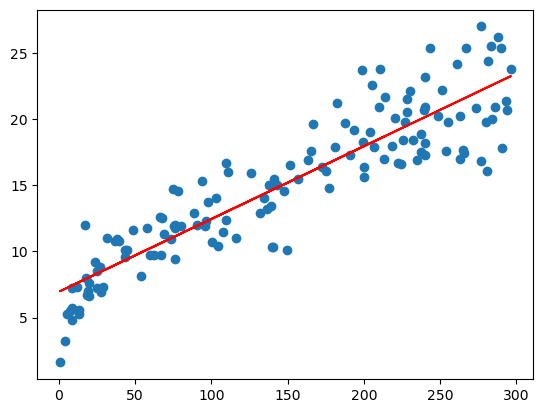

In [14]:
# plot the regression line on training set

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.949 + 0.055 * X_train, 'r')
plt.show()

#### 4. evaluate the model on training set (residual analysis)

In this step we will verify the assumptions on linear regression & below are the assumptions:

- There is a linear relationship b/w X and y. [**Verified**] (since a straight line is obtain from the model)

- Error terms are normally distributed with 0 mean and not on X, y [**Verified**] (since below plot is bell curve which is a normal distribution centered at 0)


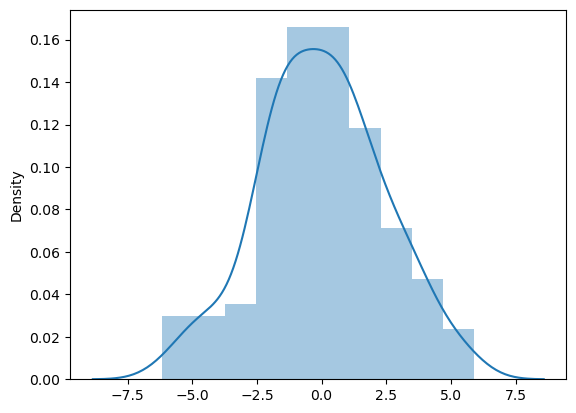

In [15]:
#y_train_predicted = 6.949 + 0.055 * X_train
y_train_predicted = model.predict(X_train_sm)
error_term = y_train - y_train_predicted
sns.distplot(error_term)
plt.show()

- Error terms are independent of each other. [**Verified**] (since we can not see any pattern in below plot)
- Error terms have constant variance. [**Verified**] (although the variance is high but is constant in the plot i.e. distributed  equally in plot)

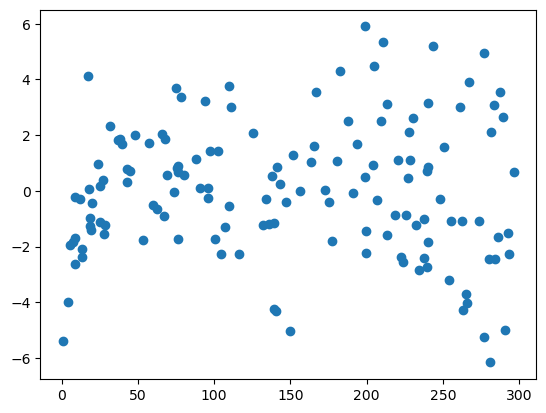

In [16]:
plt.scatter(X_train, error_term)
plt.show()

#### 5. evaluate the model on test set

In [17]:
# make predections on test set

X_test_sm = sm.add_constant(X_test)
y_test_predicted = model.predict(X_test_sm)

In [18]:
# rsquared error
r2_score(y_true = y_test, y_pred = y_test_predicted)

0.7921031601245659

Any variation between in range (0-5%) in rsquared error represents the correctness of model. Here r2 score of traiing set is
81.6% and r2 score of test set in 79.2%. Since the differnce is in good range and hence the model is good.

In [19]:
mean_squared_error(y_true = y_test, y_pred = y_test_predicted)

4.077556371826953

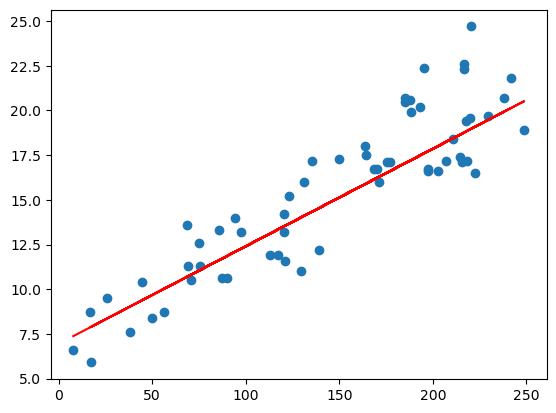

In [20]:
# plot the regression line on test set

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_predicted, 'r')
plt.show()